In [2]:
import numpy as np
import matplotlib.pyplot as plt

from package import image_to_grey
from package import first_order_position
from package import move_position
from package import remove_carrier
from package import double_fft

from package.utils import plot_amplitude
from package.utils import plot_3d_phase

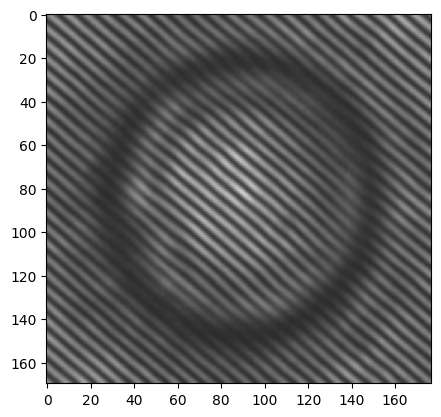

(np.float64(0.16470588743686676), np.float64(0.8274509906768799))

In [3]:
image = plt.imread("Images/example/cell-2.png")

plt.imshow(image)
plt.show()

image = image_to_grey(image)
np.min(image), np.max(image)

In [4]:
def get_mask(img, rel_radius1, rel_radius2):
    rows, cols = img.shape

    y, x = np.mgrid[:rows, :cols]
    yc, xc = rows // 2, cols // 2

    
    size = max(rows, cols)
    radius1 = int(size * rel_radius1)
    radius2 = int(size * rel_radius2)

    y, x = np.mgrid[:rows, :cols]
    yc, xc = rows // 2, cols // 2

    mask1 = ((x - xc) ** 2) + ((y - yc) ** 2) <= radius1 ** 2
    mask2 = ((x - xc) ** 2) + ((y - yc) ** 2) >= radius2 ** 2

    mask = mask1 & mask2
    return mask

In [5]:
def scale_cell(image, mask, vmin=0.05, vmax=0.95):
    image_c = image.copy()
    image_c[~mask] = np.nan

    val_min = np.nanmin(image_c)
    val_max = np.nanmax(image_c)

    image_c = (image_c - val_min) / (val_max - val_min)
    image_c = image_c * (vmax - vmin) + vmin

    image_c[~mask] = image[~mask]
    return image_c

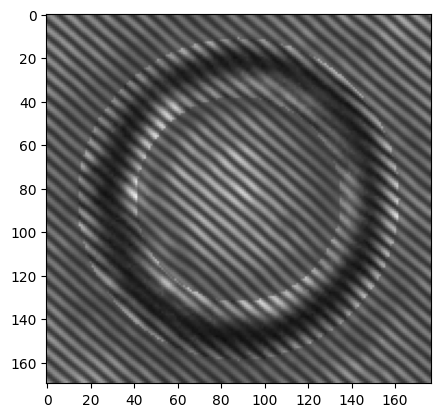

In [6]:
image = plt.imread("Images/example/cell-2.png")
image = image_to_grey(image)

mask = get_mask(image, 0.42, 0.27)
image = scale_cell(image, mask)

plt.imshow(np.repeat(image[:, :, None], 3, -1))
plt.show()

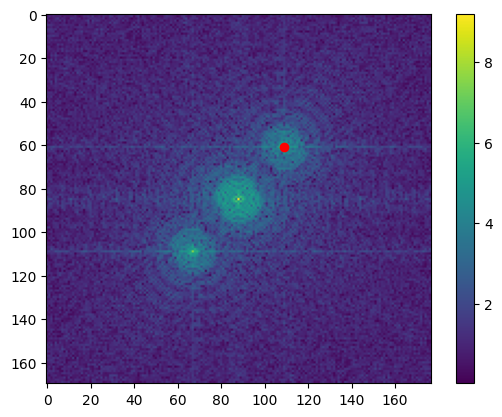

In [7]:
F = np.fft.fft2(image)
F = np.fft.fftshift(F)

peak = first_order_position(F)

plot_amplitude(F, peak, show=True)
plt.show()

In [11]:
from scipy.ndimage import median_filter
from scipy.ndimage import uniform_filter

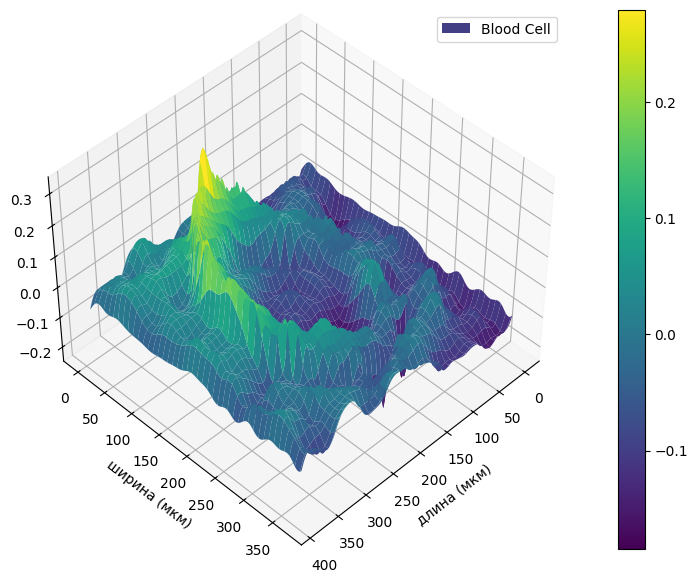

In [14]:
A, phi = double_fft(np.repeat(image[:, :, None], 3, -1))

# phi = uniform_filter(phi, size=11)

plot_3d_phase(A, phi, pixel_size=2.2, wave_length=1.0)
plt.show()